<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/IMT_TFIDF_X_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **CASE**: Avaliação de aplicativos de comida do Google Play

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Scraping

In [ ]:
# Google play scraper: https://github.com/JoMingyu/google-play-scraper
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.5 MB/s eta 0:00:00


## Select apps_ids

Vamos selecionar apps nacionais de comida.

## Get app info (app_id)

In [ ]:
len(df)

8000

In [ ]:
apps_ids = ['br.com.brainweb.ifood',
            'com.mcdo.mcdonalds',
            'habibs.alphacode.com.br',
            'com.ubercab.eats',
            'burgerking.com.br.appandroid',
            'com.grability.rappi',
            'com.vanuatu.aiqfome',
            ]

from tqdm import tqdm
from google_play_scraper import Sort, reviews, app

app_infos = []

for ap in tqdm(apps_ids):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

app_infos_df.title.value_counts()

100%|██████████| 7/7 [00:01<00:00,  6.33it/s]


,count
title,
iFood comida e mercado em casa,1
McDonald's Offers and Delivery,1
Habib's: Descontos e Delivery,1
Uber Eats: Food Delivery,1
Burger King Brasil,1
"Rappi: Food Delivery, Grocery",1
aiqfome: delivery de tudo,1


## Scraping App Reviews



In [ ]:
app_reviews = []

for ap in tqdm(apps_ids):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='pt',
                country='br',
                sort=sort_order,
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 7/7 [00:08<00:00,  1.18s/it]


## Saving reviews in a DataFrame

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,f6de41bd-a006-449d-b031-85ed266a2f1b,Priscila Araújo Claudio,https://play-lh.googleusercontent.com/a-/ALV-U...,"Eu desinstalei e instalei de novo e nada, não ...",1,3,10.36.0,2024-10-05 22:22:39,None,NaT,10.36.0,most_relevant,br.com.brainweb.ifood
1,ca26bf3c-fe4e-4975-8d5e-e1cdff78f91c,Leandro Antunes Bitencourt,https://play-lh.googleusercontent.com/a-/ALV-U...,Os restaurantes não tem limite de tempo para c...,1,7,10.36.0,2024-10-07 00:43:25,None,NaT,10.36.0,most_relevant,br.com.brainweb.ifood
2,95f61ca3-de0f-466b-8aef-c29e95fd28aa,Luiz Gallas,https://play-lh.googleusercontent.com/a-/ALV-U...,Não estou conseguindo inserir nenhum cartão de...,1,49,10.36.0,2024-10-06 15:20:15,None,NaT,10.36.0,most_relevant,br.com.brainweb.ifood
3,2ff55baa-1439-4777-b042-fefd8497edf9,Dan,https://play-lh.googleusercontent.com/a-/ALV-U...,Aí você gasta minutos valiosos montando seu pe...,1,76,10.36.0,2024-10-05 16:07:57,None,NaT,10.36.0,most_relevant,br.com.brainweb.ifood
4,ac209eb1-b96d-4761-9013-7c62fe673c98,Walter Silva,https://play-lh.googleusercontent.com/a-/ALV-U...,"Infelizmente tive uma péssima experiência, com...",1,5,10.36.0,2024-10-07 17:02:24,None,NaT,10.36.0,most_relevant,br.com.brainweb.ifood


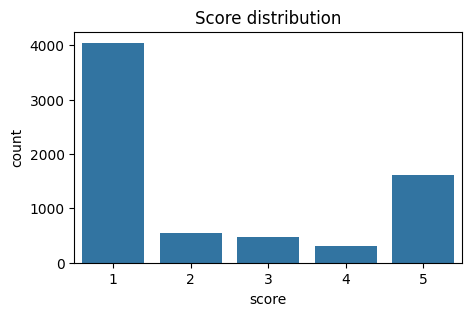

In [ ]:
plt.figure(figsize=(5,3))

sns.countplot(x='score',data=app_reviews_df)
plt.title('Score distribution')
plt.show()

#### Q1. Quantos reviews foram coletados de cada appId?

In [ ]:
app_reviews_df.appId.value_counts()

In [ ]:
app_reviews_df.to_csv('app_reviews_df.csv',index=None)

# **Importante: WITHOUT SCRAPING**

As informações que você coletou mudam a toda hora... afinal, aparecem novas revisões a cada dia. Então vamos empregar um dataset comum a todos.

In [ ]:
df = pd.read_csv("https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/app_reviews_df.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,213,9.227.0,2023-10-10 21:03:49,NaN,NaN,9.227.0,most_relevant,br.com.brainweb.ifood
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,487,9.226.0,2023-10-01 10:53:46,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,237,9.226.0,2023-09-29 23:06:49,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood


In [ ]:
df.shape

(8000, 13)

#### Q2. Quais scores estão mais presentes na base de dados?

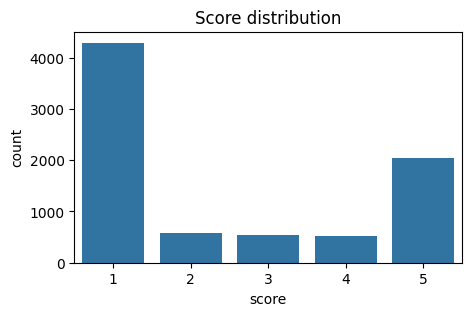

In [ ]:
plt.figure(figsize=(5,3))

sns.countplot(x='score',data=df)
plt.title('Score distribution')
plt.show()

## Sentiment from score

Crie uma atributo `sentiment` em `df` atribuindo os seguintes sentimentos a cada review:

<br>

$-1$, negativo se `score` $\le 2$,

$0$, neutro se `score` $= 3$,

$+1$, positivo se `score` $\gt 3$

In [ ]:
df['sentiment'] = df.score.replace([1,2,3,4,5],[-1,-1,0,1,1])

## Load `nltk`

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Q3. Acesse a lista de `stopwords` em português (`stopwords.words('portuguese')`). Qual a posição da `stopword` "não"?

In [ ]:
stopwords.words('portuguese')[0:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [ ]:
len( stopwords.words('portuguese') )

207

In [ ]:
 stopwords.words('portuguese').index('não')

120

## Use a seguinte função de pré-processamento de textos

In [ ]:
def text_preprocessing(s):
    # Always lower
    s = s.lower()
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\!\?\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    # Remove stopwords except 'não' e 'nem'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('portuguese')
                  or word in ['não','nem']])

    return s


Crie uma lista `X_preprocessed` em que cada elemento é texto de revisão (`df.content`) pré-processado pela função acima.

<small>
nota: talvez pudéssemos empregar o preprocessor na função de tokenização, ou mesmo o stop_words da função, mas aqui vamos por partes...

In [ ]:
X_preprocessed = np.array([text_preprocessing(text) for text in df.content])

In [ ]:
#@markdown Check if True
X_preprocessed[7000][0:100] == 'última atualização fica apresentando erro conexão parece internet caiu sendo verifiquei tá tudo ok a'

True

## TF-IDF

Empregue o estimador de TF-IDF de textos do `scikit-learn` com os seguintes parâmetros,

```
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False,
                         ...
```

e o máximo tamanho de representação dos texto com 4096, para criar representações TF-IDF dos textos pré-processados de `X_preprocessed`.

**Lembre-se**, um estimador possui métodos `fit()` e `transform()`...







In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False,
                         max_features=4096)

X_tfidf = tf_idf.fit_transform(X_preprocessed)


CPU times: user 740 ms, sys: 20.7 ms, total: 761 ms
Wall time: 764 ms


In [ ]:
X_tfidf

<8000x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 180905 stored elements in Compressed Sparse Row format>

In [ ]:
X_tfidf.toarray().shape

(8000, 4096)

In [ ]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_tfidf.toarray()[ X_tfidf.toarray() != 0 ]

array([0.20201876, 0.12877678, 0.07001234, ..., 0.5667398 , 0.49916339,
       0.51562022])

In [ ]:
#@markdown Check if True
X_tfidf.toarray()[ X_tfidf.toarray() != 0 ].sum() == 32607.820314182558

False

In [ ]:
X0 = X_tfidf.toarray() != 0
# sns.heatmap(X0)
# plt.show()

## KNeighborsClassifier

Empregue os valores TF-IDF obtidos dos textos de review acima, `X_tfidf`, para fazer uma classificação do sentimento das revisões. **Empregue o modelo de K-vizinhos mais próximos, com `k=8` e função distância cosseno.**

Empregue `random_state=1`, 0.3 de dados de teste estratificados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.3, random_state=1)

clf = KNeighborsClassifier(n_neighbors=8,metric='cosine')

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.89      1465
           0       0.52      0.27      0.35       164
           1       0.82      0.83      0.82       771

    accuracy                           0.84      2400
   macro avg       0.74      0.67      0.69      2400
weighted avg       0.83      0.84      0.83      2400



#### Q4. Qual a acuracidade obtida do modelo de K-vizinhos mais próximos?







#### Q5. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!'. Ambas deram o resultado esperado?

In [ ]:
my_test = tf_idf.transform(['Aplicativo Lixo'])
clf.predict(my_test)

array([-1])

In [ ]:
my_test = tf_idf.transform(['Maravilha!'])
clf.predict(my_test)

array([-1])

## RandomForestClassifier

Altere o código do modelo anterior para empregar uma Floresta de Árvores Aleatórias não esquecendo de empregar `random_state=1`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(random_state=1)

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1465
           0       0.98      0.96      0.97       164
           1       0.98      0.99      0.98       771

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.99      0.98      0.98      2400



#### Q6. Qual a acuracidade obtida do modelo de Floresta?







#### Q7. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!' com o novo modelo. Ambas deram o resultado esperado?

In [ ]:
my_test = tf_idf.transform(['Aplicativo Lixo'])
clf.predict(my_test)

array([-1])

In [ ]:
my_test = tf_idf.transform(['Maravilha!'])
clf.predict(my_test)

array([1])

## RandomForestClassifier

Altere o código do modelo Floresta de Árvores Aleatórias anterior agora para classificar o score dos reviews.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = df.score

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(random_state=1)

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1288
           2       1.00      0.96      0.98       177
           3       0.99      0.95      0.97       164
           4       1.00      0.89      0.94       156
           5       0.95      1.00      0.98       615

    accuracy                           0.98      2400
   macro avg       0.99      0.96      0.97      2400
weighted avg       0.98      0.98      0.98      2400



#### Q8. Qual a acuracidade obtida na classificação do score dos reviews?

In [ ]:
df.content

,content
0,"Uso bastante pra fazer mercado, mas, nas últim..."
1,Fiz uma compra que tinha desconto e não entrou...
2,"Aplicativo não funciona mais, os pedidos são f..."
3,"Quando o carrinho de mercado está muito cheio,..."
4,O app é muito bom! O problema é o atendimento....
...,...
7995,Ótimo
7996,É ótimo
7997,"O app não fornece suporte ao cliente, simplesm..."
7998,Fiz um pagamento via pix e até hoje não estorn...


In [ ]:
# prompt: empregue o bert para obter uma análise de sentimento de cada uma das ocorrências de df.content

# !pip install transformers

from transformers import pipeline
import pandas as pd

# df = df.iloc[0:100]

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model_name='neuralmind/bert-base-portuguese-cased') # ,model_name="ardiffnlp/twitter-roberta-base-sentiment")

# Assuming df.content is a pandas Series or list of strings
sentiments = []
for content in df.content:
  try:
    result = sentiment_pipeline(content)[0]
    sentiments.append({'label': result['label'], 'score': result['score']})
  except:
    sentiments.append({'label': 'unknown', 'score': 0.0})

# Add the sentiment analysis results to the dataframe
df['bert_sentiment'] = [s['label'] for s in sentiments]
df['bert_sentiment_score'] = [s['score'] for s in sentiments]

print(df[['content', 'bert_sentiment', 'bert_sentiment_score']])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                                content bert_sentiment  \
0     Uso bastante pra fazer mercado, mas, nas últim...        unknown   
1     Fiz uma compra que tinha desconto e não entrou...        unknown   
2     Aplicativo não funciona mais, os pedidos são f...        unknown   
3     Quando o carrinho de mercado está muito cheio,...        unknown   
4     O app é muito bom! O problema é o atendimento....        unknown   
...                                                 ...            ...   
7995                                              Ótimo        unknown   
7996                                            É ótimo        unknown   
7997  O app não fornece suporte ao cliente, simplesm...        unknown   
7998  Fiz um pagamento via pix e até hoje não estorn...        unknown   
7999                Ta perdendo feio para concorrência.        unknown   

      bert_sentiment_score  
0                      0.0  
1                      0.0  
2                      0

In [ ]:
df.bert_sentiment_score.value_counts()

,count
bert_sentiment_score,
0.0,8000


In [ ]:
# prompt: empregue o bert para fazer um tokenizer do campo df.content

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from transformers import pipeline, AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

# Tokenize the content
tokenized_content = [tokenizer.tokenize(text) for text in df.content]

# Print the tokenized content
print(tokenized_content)


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[['Us', '##o', 'bastante', 'pra', 'fazer', 'mercado', ',', 'mas', ',', 'nas', 'últimas', '4', 'vezes', ',', 'tiv', '##e', 'experiências', 'hor', '##ríveis', '.', 'O', 'aplicativo', 'tem', 'o', 'objetivo', 'de', 'ag', '##ili', '##zar', 'a', 'vida', 'do', 'cliente', ',', 'principalmente', 'em', 'relação', 'a', 'ganhar', 'tempo', ',', 'mas', 'quando', 'conclu', '##o', 'a', 'lista', 'de', 'compras', ',', 'ou', 'antes', ',', 'o', 'aplicativo', 'simplesmente', 'trav', '##a', 'e', ',', 'quando', 'volta', ',', 'tudo', 'que', 'eu', 'escolh', '##i', 'som', '##e', ',', 'e', 'eu', 'tenho', 'que', 'pesquisa', '##r', 'e', 'escolher', 'todos', 'os', 'produtos', 'de', 'novo', '.', 'Deve', '##m', 'melhorar', 'o', 'desempenho', ',', 'p', '##q', 'dessa', 'forma', 'não', 'cump', '##rem', 'o', 'que', 'propõe', '##m', 'e', 'isso', 'gera', 'estre', '##s', '##se', 'e', 'perda', 'de', 'tempo', '.'], ['Fi', '##z', 'uma', 'compra', 'que', 'tinha', 'descont', '##o', 'e', 'não', 'entrou', ',', 'repor', '##te', '##

In [ ]:
# prompt: empregue o bert para fazer um embedding do campo df.content
df = df.iloc[0:10]
import numpy as np
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModel

# Load the pre-trained BERT model and tokenizer
model_name = "neuralmind/bert-base-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_bert_embedding(text):
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
  outputs = model(**inputs)
  embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
  return embeddings

# Apply the embedding function to the 'content' column
df['bert_embedding'] = df['content'].apply(lambda x: get_bert_embedding(x) if isinstance(x, str) else np.nan)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
len(df['bert_embedding'][0][0])

768

In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,bert_sentiment,bert_sentiment_score,bert_embedding
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,213,9.227.0,2023-10-10 21:03:49,NaN,NaN,9.227.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.10629472, -0.25524652, 0.4295757, 0.01073..."
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,487,9.226.0,2023-10-01 10:53:46,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.1085517, -0.33721894, 0.104776934, 0.0624..."
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,237,9.226.0,2023-09-29 23:06:49,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.004316517, -0.26029238, 0.31047553, 0.342..."
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.09501655, -0.22078073, 0.21607263, 0.1006..."
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.10261001, -0.1547216, 0.23953997, 0.12292..."
5,194f4a60-6e6d-4817-b519-83e1e0dc1598,Sandra Cardoso,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso muito o App, porém na última semana está h...",3,3,9.228.0,2023-10-13 21:20:55,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.21593879, -0.26491582, 0.14976108, 0.0194..."
6,7e1becde-d899-4cde-b6e0-42dcf533630a,Daniel Faustino,https://play-lh.googleusercontent.com/a-/ALV-U...,O app tá horrível não esta dando pra comprar f...,2,15,9.227.0,2023-10-07 12:53:04,NaN,NaN,9.227.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.111154884, -0.28944638, 0.36409688, 0.168..."
7,c980a474-de99-48df-a07a-df6d0b1aadb3,Maicon Parra,https://play-lh.googleusercontent.com/a-/ALV-U...,Melhorou muito a experiência do usuário. Uma f...,5,8,9.226.0,2023-10-04 19:09:00,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.041211538, -0.27741396, 0.53484464, 0.099..."
8,51ab2e02-8279-42a9-a96e-a1192ed3b9fc,Felix Lima,https://play-lh.googleusercontent.com/a-/ALV-U...,l. Adicionar função colocar foto própria dos u...,3,13,9.226.0,2023-10-01 16:43:23,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[-0.055565733, -0.31116784, 0.5855486, 0.1037..."
9,796b6697-1806-445b-8c76-1f7ff32e355b,Tatiana Mara Legal Alves,https://play-lh.googleusercontent.com/a/ACg8oc...,"App está travando já tem um tempo, em diversas...",2,0,9.228.0,2023-10-14 13:17:41,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood,unknown,0.0,"[[0.02833089, -0.34295818, 0.59605986, 0.27870..."
